## Application of BPR on Movielens

In [1]:
#%load_ext watermark
%load_ext autoreload 
%autoreload 2

In [2]:
import os
import sys
import itertools
import numpy as np
import pandas as pd
from subprocess import call
from pybpr import *
import matplotlib.pyplot as plt
from functools import partial

In [3]:
%%time
#df = load_movielens_data('ml-1m')
df = load_movielens_data('ml-100k')
dfshort = df[df['rating'] > 0]
df.head()

CPU times: user 19 ms, sys: 10.1 ms, total: 29.1 ms
Wall time: 30.7 ms


,user_id,item_id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [4]:
rdf = pd.read_csv(os.path.join(os.path.curdir, 'output', 'ml100k_bpr_results.csv'), index_col=0)
rdf.head()

,num_features,ndcg_num_items,num_iters,learning_rate,reg_lambda,batch_size,initial_std,test_ratio,ndcg_test,ndcg_train
0,2,10,100,0.1,0.0,5,0.01,0.2,0.156252,0.370146
1,2,10,100,0.1,0.0,10,0.01,0.2,0.179129,0.402473
2,2,10,200,0.1,0.0,5,0.01,0.2,0.267301,0.500322
3,2,10,200,0.1,0.0,10,0.01,0.2,0.281387,0.516389
4,7,10,100,0.1,0.0,5,0.01,0.2,0.171148,0.390304


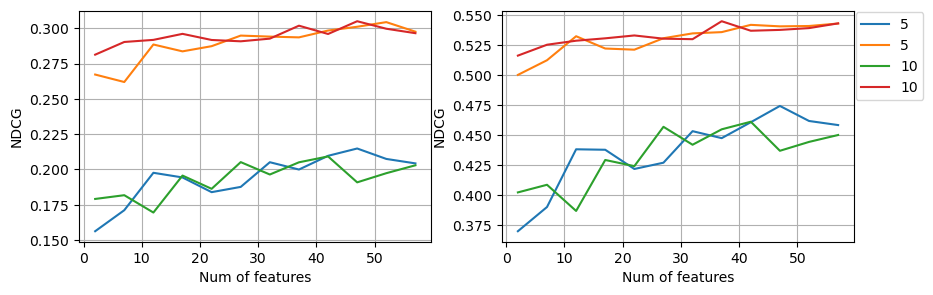

In [5]:
fig, ax = plt.subplots(1, 2, figsize=(10,3))
for ival in rdf['batch_size'].unique():
    idf = rdf[(rdf['batch_size']==ival) & (rdf['ndcg_num_items']==10) & (rdf['num_iters']==100)]
    ax[0].plot(idf['num_features'], idf['ndcg_test'], label=f'{ival}')
    ax[1].plot(idf['num_features'], idf['ndcg_train'], label=f'{ival}')
    idf = rdf[(rdf['batch_size']==ival) & (rdf['ndcg_num_items']==10) & (rdf['num_iters']==200)]
    ax[0].plot(idf['num_features'], idf['ndcg_test'], label=f'{ival}')
    ax[1].plot(idf['num_features'], idf['ndcg_train'], label=f'{ival}')
    ax[1].legend(loc=2, borderaxespad=0.1, bbox_to_anchor=(1.0, 1.0))
for iax in ax:
    iax.grid(True)
    #iax.set_ylim([0, 1])
    iax.set_ylabel('NDCG')
    iax.set_xlabel('Num of features')
    #iax.legend(loc=2, borderaxespad=0.1)